<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
<center>Author: [Mariya Mansurova](https://www.linkedin.com/in/mariya-mansurova-04070982/), analyst & developer in Yandex.Metrics team. <br>Translated by [Ivan Zakharov](https://www.linkedin.com/in/ivan-zakharov/), ML enthusiast.
<br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# <center> Assignment #9 (demo)
## <center> Time series analysis

**Fill cells marked with "Your code here" and submit your answers to the questions through the [web form](https://docs.google.com/forms/d/1UYQ_WYSpsV3VSlZAzhSN_YXmyjV7YlTP8EYMg8M8SoM/edit).**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import os

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests
import pandas as pd

print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

5.15.0


## Data preparation

In [2]:
df = pd.read_csv('../input/wiki_machine_learning.csv', sep = ' ')
df = df[df['count'] != 0]
df.reset_index(inplace = True)
df.head()

,index,date,count,lang,page,rank,month,title
0,81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
1,80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
2,79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
3,78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
4,77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [3]:
df.shape

(383, 8)

## Predicting with FB Prophet

In [4]:
df.date = pd.to_datetime(df.date)

In [5]:
plotly_df(df.set_index('date')[['count']])

In [6]:
from prophet import Prophet

In [7]:
prediction_size = 30

df = df[['date', 'count']]
df.columns = ['ds', 'y']
train = df[:-prediction_size]
test = df[-prediction_size:]
df.tail()

,ds,y
378,2016-01-16,1644
379,2016-01-17,1836
380,2016-01-18,2983
381,2016-01-19,3389
382,2016-01-20,3559


In [8]:
m = Prophet()
m.fit(train)

18:55:30 - cmdstanpy - INFO - Chain [1] start processing
18:55:30 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = m.make_future_dataframe(periods=prediction_size)
future.tail()

,ds
378,2016-01-16
379,2016-01-17
380,2016-01-18
381,2016-01-19
382,2016-01-20


In [10]:
forecast = m.predict(future)
forecast = forecast[['ds','yhat']]
forecast.tail()

,ds,yhat
378,2016-01-16,2118.676650
379,2016-01-17,2265.075300
380,2016-01-18,3272.585682
381,2016-01-19,3538.121339
382,2016-01-20,3427.645340


**<font color='red'>Question 1:</font>** What is the prediction of the number of views of the wiki page on January 20? Round to the nearest integer.

- 4947
- **3426**
- 5229
- 2744

Estimate the quality of the prediction with the last 30 points.

In [11]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
y_true = test[-prediction_size:].y
y_pred = forecast[-prediction_size:].yhat
mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print(f'MAPE: {round(mape*100, 2)}')
print(f'MAE: {round(mae, 2)}')

MAPE: 34.55
MAE: 600.77


**<font color='red'>Question 2:</font> What is MAPE equal to?**

- **34.5**
- 42.42
- 5.39
- 65.91

**<font color='red'>Question 3:</font> What is MAE equal to?**

- 355
- 4007
- **600**
- 903

## Predicting with ARIMA

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt
plt.rcParams['figure.figsize'] = (8, 3)

**<font color='red'>Question 4:</font> Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?**

- Series is stationary, p_value = 0.107
- **Series is not stationary, p_value = 0.107**
- Series is stationary, p_value = 0.001
- Series is not stationary, p_value = 0.001

In [13]:
def dickey_fuller_test(series, alpha = 0.05):
    p = sm.tsa.stattools.adfuller(series)[1]
    if p < alpha:
        stationarity = 'stationary'
    else:
        stationarity = 'not stationary'
    print(f'Series is {stationarity}, p_value = {round(p, 3)}')

dickey_fuller_test(train.y)  

Series is not stationary, p_value = 0.107


**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> <font color='red'>Question 5:</font> What parameters are the best for the model according to the `AIC` criterion?**

- D = 1, d = 0, Q = 0, q = 2, P = 3, p = 1
- D = 2, d = 1, Q = 1, q = 2, P = 3, p = 1
- **D = 1, d = 1, Q = 1, q = 2, P = 3, p = 1**
- D = 0, d = 0, Q = 0, q = 2, P = 3, p = 1

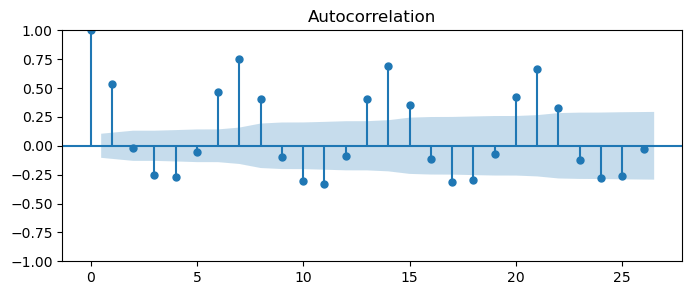

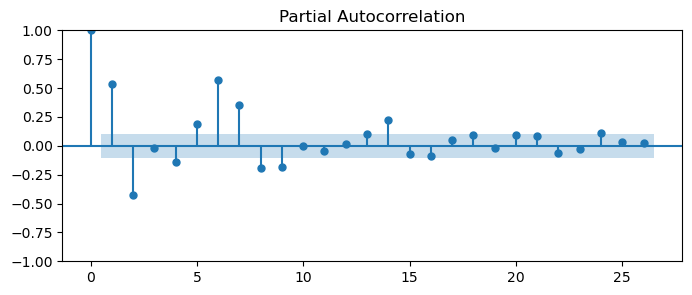

In [14]:
smt.graphics.plot_acf(train.y)
smt.graphics.plot_pacf(train.y);

Weekly seasonality can be seen in the plots.

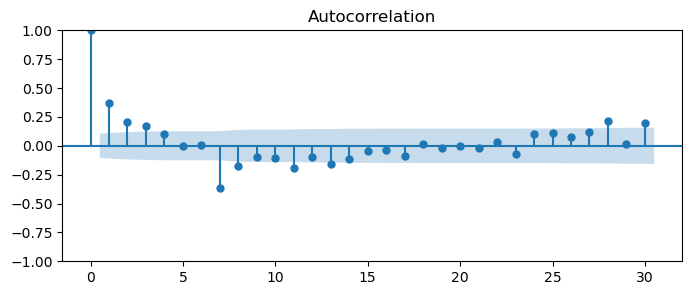

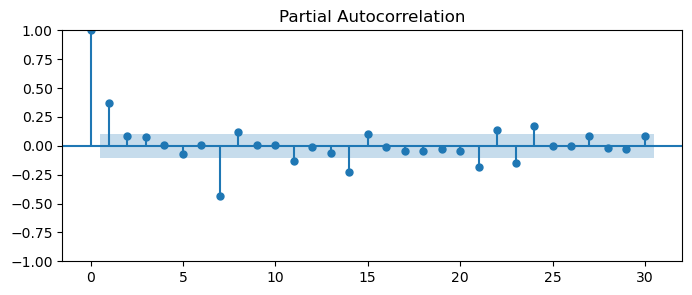

In [15]:
train_diff = train - train.shift(7)
smt.graphics.plot_acf(train_diff.y[7:], lags = 30)
smt.graphics.plot_pacf(train_diff.y[7:], lags = 30);

It seems that:
- q <= 4 (as the first 4 lags are the most significant in the ACF plot)
- p is 2 (as the first 2 lags are the most significant in the PACF plot)
- Q = 1 (as 7th lag is significant in the ACF plot and 14th lag is not)
- P = 2 or 3 (as 7th and 14th (and maybe 21st) lags are significant in the PACF plot and 28th lag is not)
- d = 0 is probably enough as there is no many significant lags in the plots. 1 might also work, though.

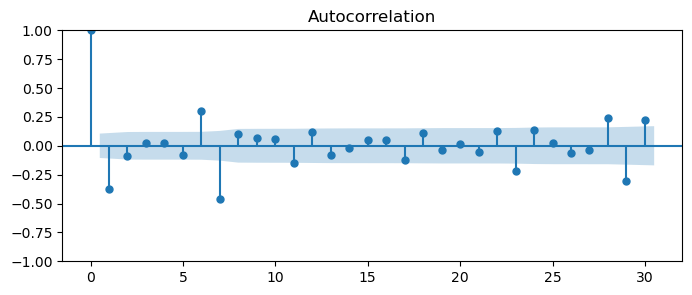

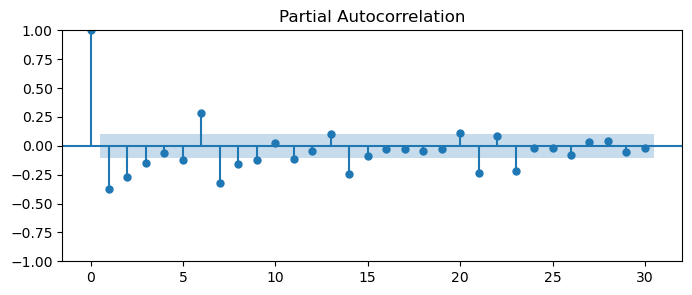

In [16]:
train_diff = train_diff - train_diff.shift(1)
smt.graphics.plot_acf(train_diff.y[8:], lags = 30)
smt.graphics.plot_pacf(train_diff.y[8:], lags = 30);

If d = 1:
- Q = 1
- P = 3
- q = 2
- p = 3 or 4

In [17]:
import itertools
from tqdm.notebook import tqdm

def opt_sarimax(data, param_combinations, s = 0):
    best_aic = float('inf')
    best_model = None
    best_params = [0]*6
    
    tq = tqdm(param_combinations)
    for combination in tq:
        D, d, Q, q, P, p = combination
        try:
            model = sm.tsa.statespace.SARIMAX(
                    data,
                    order=(p, d, q),
                    seasonal_order=(P, D, Q, s),
                ).fit(disp=-1)
            aic = model.aic
        except:
            continue
        
        if aic < best_aic:
            best_aic = aic
            best_model = model
            best_params = combination
            tq.set_description(f'Best params: {best_params}. AIC: {round(best_aic, 0)}')
            
    return dict(zip(('D', 'd', 'Q', 'q', 'P', 'p'), best_params)), best_model

def make_combinations(
    D_options = range(4),
    d_options = range(4),
    Q_options = range(4),
    q_options = range(4),
    P_options = range(4),
    p_options = range(4)
):
    param_combinations = itertools.product(D_options, d_options, Q_options, q_options, P_options, p_options)
    return tuple(param_combinations)

In [18]:
warnings.filterwarnings('ignore')
param_combinations = make_combinations( 
    D_options = [1],
    d_options = (0, 1),
    Q_options = [1],
    q_options = range(2, 5),
    P_options = [2, 3],
    p_options = range(3))
best_params, best_model = opt_sarimax(train.y, param_combinations, s = 7)
print(best_params)

  0%|          | 0/36 [00:00<?, ?it/s]

{'D': 1, 'd': 1, 'Q': 1, 'q': 2, 'P': 3, 'p': 1}


In [19]:
slen = df.shape[0]
forecast = best_model.predict(start=slen - prediction_size, end=slen - 1)
forecast.head()

353    2854.290428
354    3351.697264
355    2847.023851
356    2494.526400
357    1702.459555
Name: predicted_mean, dtype: float64

In [20]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
y_true = test[-prediction_size:].y
y_pred = forecast[-prediction_size:]
mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print(f'MAPE: {round(mape*100, 2)}')
print(f'MAE: {round(mae, 2)}')

MAPE: 26.07
MAE: 466.86


MAE is less than for the Prophet prediction!

In [21]:
series_to_plot = df.set_index('ds').rename(columns={'y':'actual value'})
forecast = best_model.predict(start=1, end=slen)
series_to_plot['forecast'] = forecast.values
plotly_df(series_to_plot)